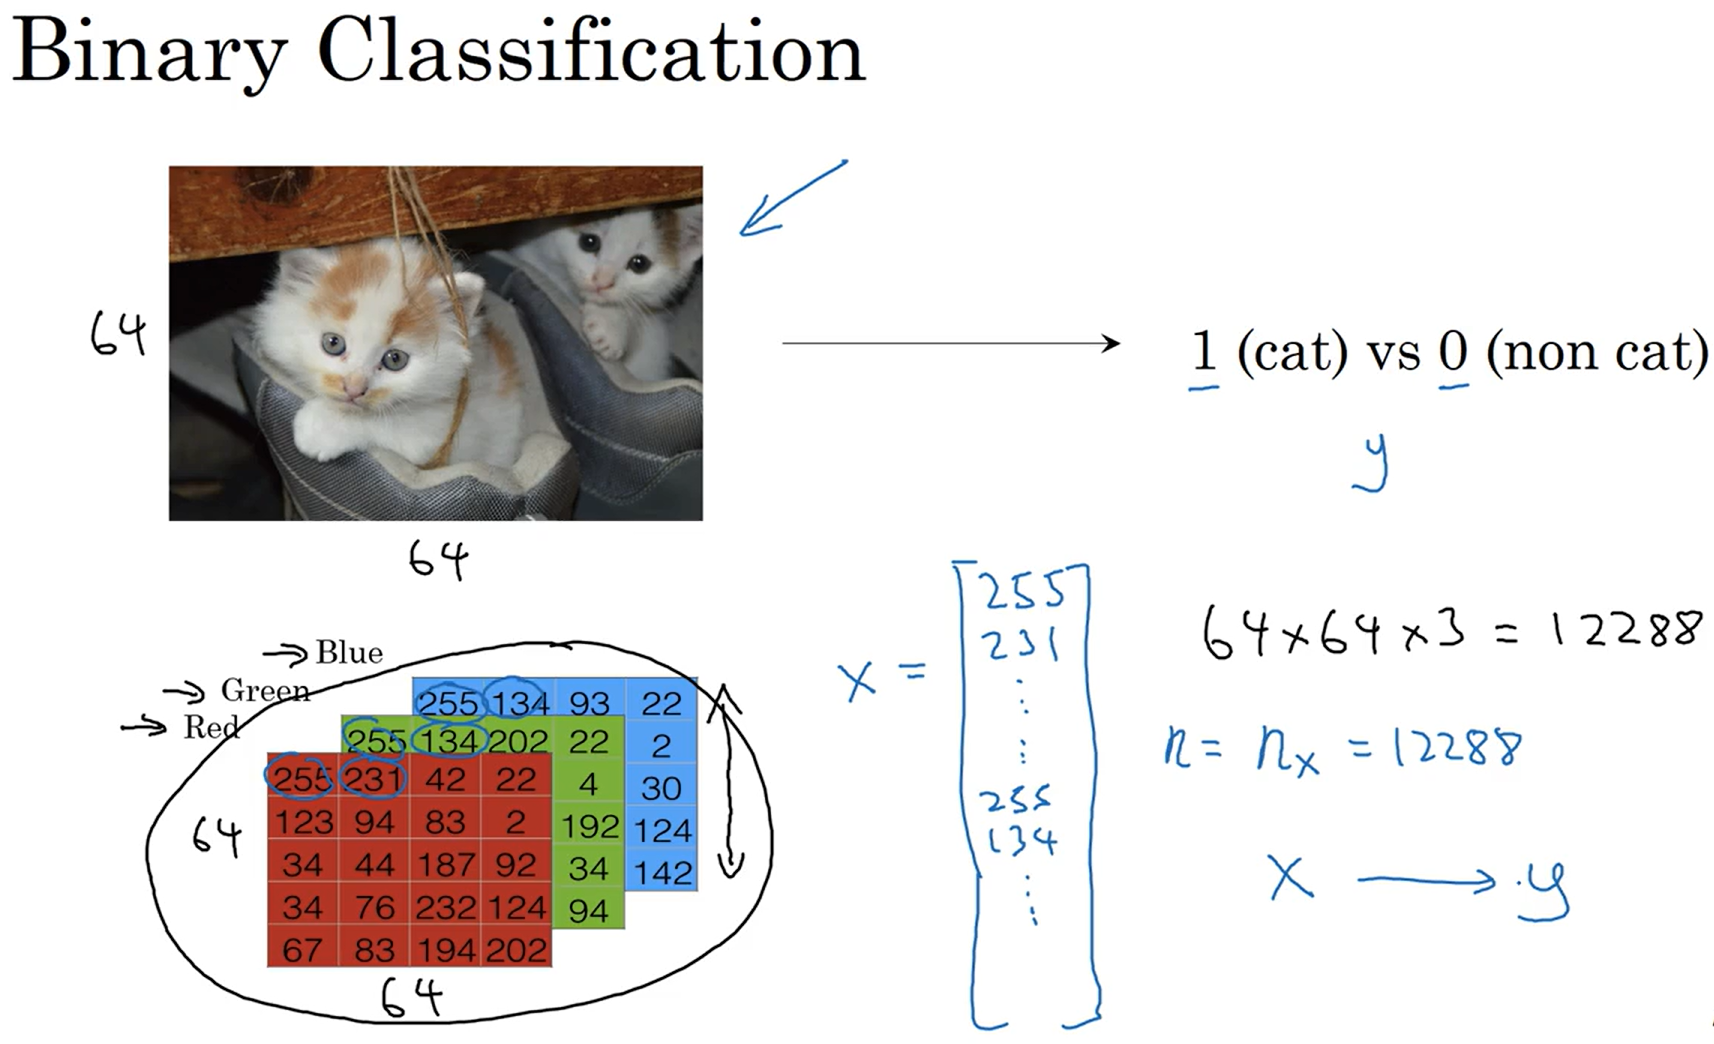

# mô hình phân loại nhị phân (binary classification), cụ thể là bài toán: ảnh có mèo (1) hay không có mèo (0)

🧩 1. Cấu trúc dữ liệu ảnh màu (RGB)
- Ảnh màu kích thước 64x64 pixel có 3 kênh màu (Red, Green, Blue). Mỗi điểm ảnh (pixel) có 3 giá trị:
    - Red: cường độ màu đỏ (0 - 255)
    - Green: cường độ màu xanh lá (0 - 255)
    - Blue: cường độ màu xanh dương (0 - 255)
- → Mỗi ảnh sẽ có dạng ma trận 3 chiều: [64, 64, 3]x`

- Trong đó:
    - 64 x 64: kích thước ảnh
    - 3: số kênh màu
- 🧠 Tổng số giá trị pixel cần xử lý = 64 × 64 × 3 = 12,288


🔄 2. Chuyển đổi ảnh màu thành vector x - hay là flatten
- Từ ảnh RGB, ta cần chuyển thành vector 1 chiều để mô hình học máy có thể xử lý:

- Cách làm:
- Mỗi kênh màu (Red, Green, Blue) là một ma trận 64×64
- Ta duyệt từng kênh, đọc lần lượt từng pixel theo hàng (hoặc cột), rồi nối các giá trị lại:
    - Đầu tiên: flatten kênh Red (64x64 = 4096 giá trị)
    - Tiếp theo: flatten kênh Green
    - Cuối cùng: flatten kênh Blue

- Red channel → [255, 231, 123, ...] (4096 giá trị)
- Green channel → [134, 42, 94, ...]
- Blue channel → [93, 22, 192, ...]

- x = [255, 231, 123, ..., 134, 42, ..., 93, 22, 192, ...] (Tổng 12,288 phần tử)


⚫ 3. Nếu ảnh là ảnh đen trắng (grayscale)?
- Ảnh đen trắng chỉ có 1 kênh, mỗi pixel chỉ chứa 1 giá trị độ sáng (0 - 255)
- Ma trận chỉ còn 64 x 64 = 4,096 giá trị
- → Vector x lúc này có kích thước: 4,096

🔁 4. Tóm tắt quy trình xử lý dữ liệu ảnh
    - 📸 Nhận ảnh (RGB hoặc grayscale)
    - 🔢 Biến đổi ảnh thành tensor (ma trận số)
    - 📉 Flatten ảnh thành vector 1 chiều (x)
    - 🧠 Gán nhãn y = 1 nếu có mèo, 0 nếu không
    - 🎯 Đưa vào mô hình học máy: x → y

# Tại sao ảnh đen trắng có 1 kênh màu mà ảnh màu lại có 3

✅ Ảnh đen trắng (Grayscale):
- Ảnh đen trắng chỉ cần 1 giá trị duy nhất để mô tả mức độ sáng tại mỗi pixel
- Không cần thông tin về màu
- Giá trị pixel nằm trong khoảng 0 (đen hoàn toàn) đến 255 (trắng hoàn toàn)

✅ Ảnh màu (RGB):
- Ảnh màu dùng hệ màu RGB (Red, Green, Blue) – là cách phổ biến nhất để mã hóa màu sắc trên máy tính.
- Mỗi pixel có 3 giá trị:
    - Cường độ màu đỏ (Red)
    - Cường độ màu xanh lá (Green)
    - Cường độ màu xanh dương (Blue)
    - Mỗi giá trị nằm trong khoảng 0 đến 255
- Khi trộn 3 màu này với tỉ lệ khác nhau → tạo ra hơn 16 triệu màu (256³)

# Notation - ký hiệu


### 📌 1. Cặp dữ liệu huấn luyện (x, y)

- x ∈ R^(n_x): là vector đặc trưng (feature vector) của một ảnh (đã được "flatten").
- y ∈ {0, 1}: là nhãn (label), trong bài toán phân loại nhị phân:
  - y = 1: có mèo (cat)
  - y = 0: không có mèo (non-cat)

- ảnh đã được flatten :
  - có 3 lớp màu R,G,B mỗi lớp là 1 ma trận 64x64 - nó sẽ duỗi ra thành 1 mảng 1 chiều có  4096 phần tử 
  - x ở đây là ta hợp 3 mảng 1 chiều của từng R, G, B lại thành 1 mảng 1 chiều duy  nhất có 12288 phần tử


### 📊 2. Tập huấn luyện với m ví dụ

Tập huấn luyện gồm m cặp dữ liệu:

{(x^(1), y^(1)), (x^(2), y^(2)), ..., (x^(m), y^(m))}

- m = M = M_train: số lượng ảnh trong tập huấn luyện.
- M_test: số lượng ảnh trong tập kiểm tra.



### 📐 3. Ma trận đặc trưng X

Toàn bộ ảnh đầu vào được ghép thành ma trận:

X = [ x^(1) | x^(2) | ... | x^(m) ]

- X ∈ R^(n_x × m)
- Mỗi cột là một ảnh (đã được flatten thành vector).
- n_x: số đặc trưng của mỗi ảnh (ví dụ: 64 × 64 × 3 = 12288).



### ✅ 4. Vector nhãn Y

Tập nhãn tương ứng với các ảnh được lưu trong vector hàng:

Y = [ y^(1), y^(2), ..., y^(m) ]

- Y ∈ R^(1 × m)
- Mỗi phần tử y^(i) ∈ {0, 1}



### 🧠 5. Tóm tắt kích thước (shape)

| Biến       | Ý nghĩa                    | Shape      |
|------------|-----------------------------|------------|
| x^(i)      | Ảnh đầu vào thứ i           | (n_x, 1)   |
| y^(i)      | Nhãn tương ứng              | (1, 1)     |
| X          | Ma trận các ảnh đầu vào     | (n_x, m)   |
| Y          | Vector nhãn                 | (1, m)     |
